In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.5314 - val_loss: 0.4636
Epoch 2/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.4265 - val_loss: 0.4055
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3944 - val_loss: 0.3862
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3764 - val_loss: 0.3703
Epoch 5/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3625 - val_loss: 0.3586


1. Add one more hidden layer to autoencoder

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.4983 - accuracy: 0.4592 - val_loss: 0.4114 - val_accuracy: 0.4870
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.3921 - accuracy: 0.4908 - val_loss: 0.3800 - val_accuracy: 0.4903
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3661 - accuracy: 0.4952 - val_loss: 0.3566 - val_accuracy: 0.4956
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3458 - accuracy: 0.4994 - val_loss: 0.3408 - val_accuracy: 0.4970
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3338 - accuracy: 0.5016 - val_loss: 0.3324 - val_accuracy: 0.4981


2. visualize the inputand reconstructed representationof the autoencoder using Matplotlib


In [0]:
prediction = autoencoder1.predict(x_test[[2],:])
#prediction

Input Image

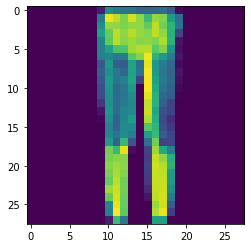

In [19]:
from matplotlib import pyplot as plt
plt.imshow(x_test[3].reshape(28,28))
plt.show()

Reconstructed Image

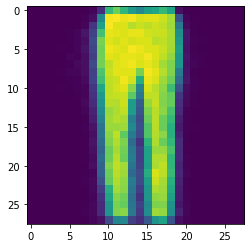

In [21]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

3. visualize the input, noisy inputand reconstructed representation(denosed output)of the Denosing_Autoencoder using Matplotlib


In [0]:
#Adding Noies
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [29]:
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3214 - accuracy: 0.5035 - val_loss: 0.2862 - val_accuracy: 0.0000e+00
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3203 - accuracy: 0.5036 - val_loss: 0.2856 - val_accuracy: 0.0000e+00
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3197 - accuracy: 0.5037 - val_loss: 0.2849 - val_accuracy: 0.0000e+00
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3185 - accuracy: 0.5038 - val_loss: 0.2839 - val_accuracy: 0.0000e+00
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3177 - accuracy: 0.5039 - val_loss: 0.2824 - val_accuracy: 0.0000e+00
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3171 - accuracy: 0.5040 - val_loss: 0.2823 - val_accuracy: 0.0000e+00
Epoch 7/20
60000/60000 [====================

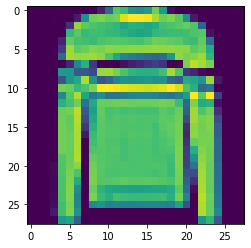

In [28]:
from matplotlib import pyplot as plt
plt.imshow(x_train[5].reshape(28,28))
plt.show()

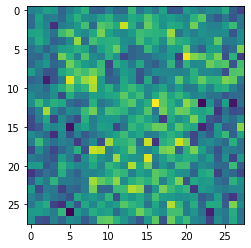

In [26]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

In [0]:
prediction1 = autoencoder1.predict(x_train_noisy[1:])


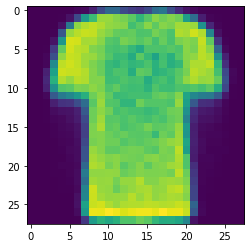

In [17]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

4. plot lossand accuracy using the history object

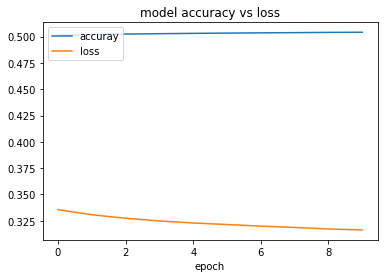

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

train[0:]
(6000,28,28,3)